# Tensorflow Tutorial 09
参考文献
- [305_tensorboard.py](https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/305_tensorboard.py)

google colab上でtensorboardはきつそう

In [0]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

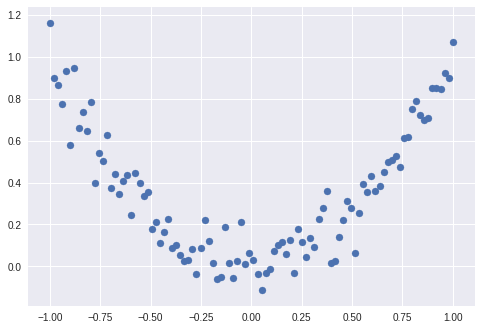

In [2]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [0]:
with tf.variable_scope('Inputs'):
    tf_x = tf.placeholder(tf.float32, x.shape, name='x')
    tf_y = tf.placeholder(tf.float32, y.shape, name='y')

In [0]:
with tf.variable_scope('Net'):
    l1 = tf.layers.dense(tf_x, 10, tf.nn.relu, name='hidden_layer')
    output = tf.layers.dense(l1, 1, name='output_layer')

    # add to histogram summary
    tf.summary.histogram('h_out', l1)
    tf.summary.histogram('pred', output)

In [5]:
loss = tf.losses.mean_squared_error(tf_y, output, scope='loss')
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)
tf.summary.scalar('loss', loss)     # add loss to scalar summary

<tf.Tensor 'loss_1:0' shape=() dtype=string>

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
writer = tf.summary.FileWriter('./log', sess.graph)     # write to file
merge_op = tf.summary.merge_all()                       # operation to merge all summary

for step in range(100):
    # train and net output
    _, result = sess.run([train_op, merge_op], {tf_x: x, tf_y: y})
    writer.add_summary(result, step)